# Project: Investigate The Movie Database (TMDb) 

--by Lu Tang

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Data can be download from[here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv).
> The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> **The project aims to explore the following questions:**
> - Question 1: What are the trend for movie industry? Are movie industry making more money over years
> - Question 2: Are newer movies more popular?
> - Question 3: What kinds of properties are associated with movies that have high revenues?
> - Question 4. Is it possible to make extremely high profit movies with low budget?
> - Question 5: What are the top 10 rated movies? and how is their profitibility?

In [1]:
# import library that will be used in this project 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# loading data
tmdb=pd.read_csv('tmdb-movies.csv')
# show number of rows and columns
print(tmdb.shape)

# show first 2 rowss
pd.options.display.max_columns = 150 # to avoid truncated output 
tmdb.head(2)

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


> **Initial observation**: 
>- Our focus will be analyzing movie properties associated with high revenue, some columns are irrelavant for our analysis,e.g `id`,`imdb_id`, `homepage`, `tagline`, `keywords, overview, production_companies, release_date` (since we already have release_year).
>- we can also remove `budget` and `revenue`, since we have `budget_adj` and `revenue_adj` to analyze.

In [3]:
# Drop extraneous columns  
drop_col=['id','imdb_id','homepage','tagline','keywords','overview','production_companies','release_date','budget','revenue']
tmdb = tmdb.drop(drop_col, axis=1)
# check the result
tmdb.head(1)

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
# check data type and missing values
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


In [5]:
# check statistical information 
tmdb.describe(include='all')

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866,10790,10822,10866.000000,10843,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,10571,10719,5067,NaN,2039,NaN,NaN,NaN,NaN,NaN
top,NaN,Hamlet,Louis C.K.,Woody Allen,NaN,Drama,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,6,45,NaN,712,NaN,NaN,NaN,NaN,NaN
mean,0.646441,NaN,NaN,NaN,102.070863,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,NaN,NaN,NaN,31.381405,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,NaN,NaN,NaN,0.000000,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,NaN,NaN,NaN,90.000000,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,NaN,NaN,NaN,99.000000,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,NaN,NaN,NaN,111.000000,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07


> **Insights**:
>- Some columns contain NaN values, but the amount is not significant; we don't need to drop all the nulls at the beginning.
>- Data type are all correct.
>- The minimum `runtime` is 0, which is impossible, and some movies have extremely long runtime, we will investigate the outlier data
>- `budget_adj` and `revenue_adj` have minimum and median value as 0 too, which is odd, and the difference from 75% to maximum is huge, we need to investigate in the later anaysis process
>-  `popularity ` , `vote_count` has very uneven distribution, with some extreme high value data.  

### Data Cleaning 

This dataseat is generally clean, column names are also clear and with preferred snakecase. For some string columns that contains '|', we will clean and analyze in the later part specific to the question we want to answer.

**1. Remove duplicated data**

In [6]:
# check how many rows are duplicated
sum(tmdb.duplicated())

1

In [7]:
# Drop duplicated rows
tmdb.drop_duplicates(inplace=True)

# douch check the results
sum(tmdb.duplicated())

0

**2. Cleaning abnormal data for runtime**

In [8]:
# Find out how many rows are 0 for runtime
sum(tmdb["runtime"]==0)

31

In [9]:
# Since it is impossible to have runtime as 0, we will remove these.
tmdb=tmdb[tmdb["runtime"]>0]

#double check the result
sum(tmdb["runtime"]==0)

0

**3. Cleaning abnormal data for budget**

In [10]:
sum(tmdb["budget_adj"]==0)

5668

In [11]:
# It is impossible to make a movie without any budget, we will remove these data
tmdb=tmdb[tmdb["budget_adj"]>0]

# Double check the result
sum(tmdb["budget_adj"]==0)

0

**4. Cleaning abnormal data for revenue**

In [12]:
sum(tmdb["revenue_adj"]==0)

1312

>- It is not impossible for a movie to have 0 revenue, we will leave these data

In [13]:
# Double check the cleaning result
print(tmdb.shape)
tmdb.head(1)

(5166, 11)


,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis

## 1. Find pattern and visualize relationship

**1_1. Explore relations with `revenue_adj`**

Text(0.5, 1.0, 'Correlation heatmap for whole movie data')

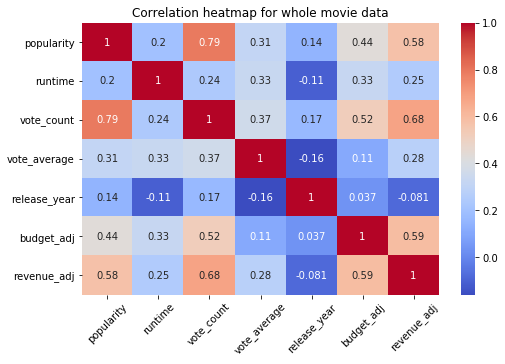

In [14]:
# plot a heatmap to see correlation with `revenue_adj` fro each columns
plt.figure(figsize=(8,5))
sns.heatmap(tmdb.corr(),annot=True,cmap='coolwarm')
plt.xticks(rotation=45)
plt.title('Correlation heatmap for whole movie data')

**Conclusion:**
>-  `revenue_adj` is positive-correlated with `popularity`, `vote_count` and `budget_adj`, which makes sense, the more popular, the more vote_count and and more revenues. And high budget movies are expected with high revenue too.
>- `popularity` and `vote_count` are strongly correlated eith each other.
>- `runtime`, `vote_average` and `release_year` do not have strong relation with any other columns. In fact `release_year` is slighly negative-correlated with `revenue_adj`. 

**1_2. Plotting charts to find out the distribution for the variables that do not have strong correlation with Movie Revenue, i.e. `runtime, vote_average, release_year`.**

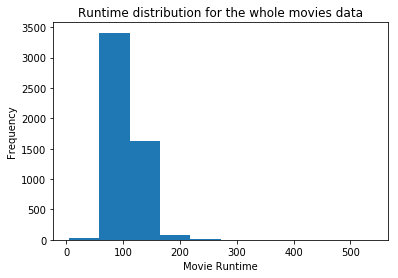

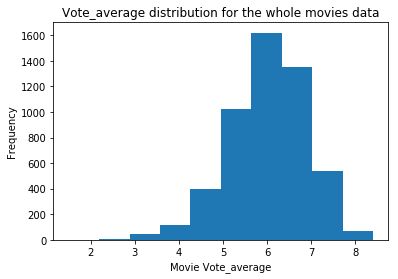

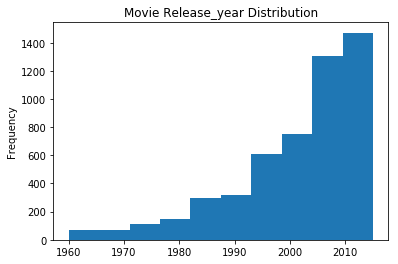

In [15]:
# plotting distribution for 'runtime'
tmdb['runtime'].plot.hist(title='Runtime distribution for the whole movies data')
plt.xlabel('Movie Runtime')
plt.show()

# plotting distribution for 'vote_average'
tmdb['vote_average'].plot.hist(title='Vote_average distribution for the whole movies data')
plt.xlabel('Movie Vote_average')
plt.show()

# plotting distribution for 'vote_average'
tmdb['release_year'].plot.hist(title=('Movie Release_year Distribution'))
plt.show()

**Conclusion:**
>- Most movies have median length from about 100 minutes to 180 minutes.
>- 'vote_average' has normal distribution, with average around 6.
>- There are more movies produced over time.

**1_3. Plotting scatter chart to explore detailed relationship between `popularity` and `vote_count`, and find out outliers.** 

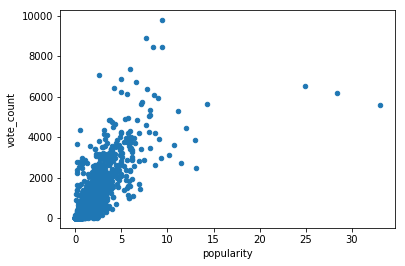

In [16]:
# plotting relation for 'popularity' and 'vote_count'
tmdb.plot.scatter(x='popularity',y='vote_count')

**Conclusion:**
>- From the scatter chart, we can confirm `popularity` and `vote_count` have strong positive correlation, same result as from the heatmap; however, we can also notice there are three movies rated extremely high popularity, but vote count is not extremely high.
>- If we run regression model to decide movie revenues, we have to choose of one of them as an independent variable, but this is beyond the goal of this project.

**1_4. Plotting scatter charts to furthur explore the relation with `revenue_adj` for the varibles of `popularity`, `vote_count` and `budget_adj`.**

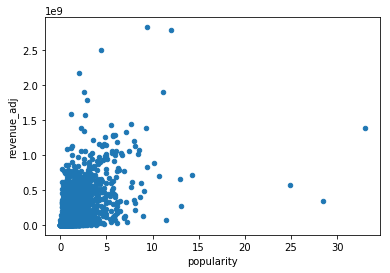

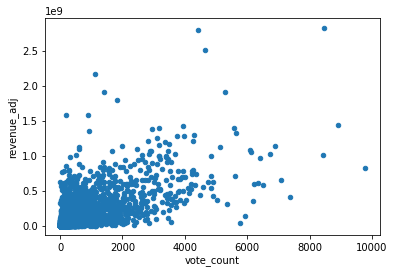

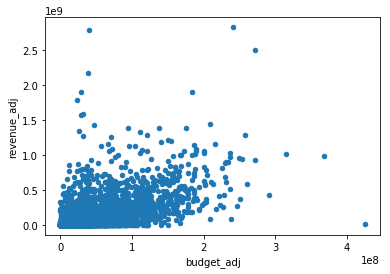

In [17]:
tmdb.plot.scatter(x='popularity', y='revenue_adj')
tmdb.plot.scatter(x='vote_count',y='revenue_adj')
tmdb.plot.scatter(x='budget_adj',y='revenue_adj')

**Conclusion:**
>- In general, the three variabels(`popularity`, `vote_count` and `budget_adj`) are all positively correlated with `revenue_adj`, but the correlation is not very strong, which is the same conclusion from the heatmap;
>- There are many outlier data, some movies with extremely high popularity and high vote_count do not have extremely high revenue. These movies maybe controversial, and popularity and vote_count alone are not good indicator for movie success.
>- Also, some extremely high budget movies do not have very high revenue, which means they maybe losing money.

## 2. Explore Answers for research questions 

### Question 1. What are the profitibility trend for movie industry? 

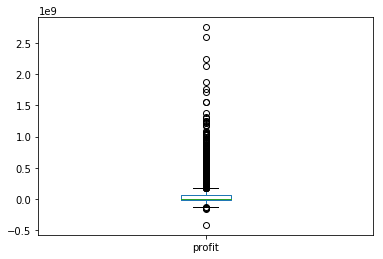

In [18]:
2. # create a column for profit
tmdb['profit']=tmdb['revenue_adj']-tmdb['budget_adj']
tmdb['profit'].plot.box()

>- **Some movies are losing money; others, however have huge profit.**

In [19]:
# Create a dataframe that group by year and calculate mean value
year_mean=tmdb.groupby('release_year').mean()
year_mean.head(2)

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj,profit
release_year,,,,,,,
1960,0.890063,108.777778,227.000000,7.022222,1.806946e+07,1.056833e+08,8.761383e+07
1961,0.650838,131.615385,157.615385,6.615385,2.588946e+07,1.895094e+08,1.636199e+08


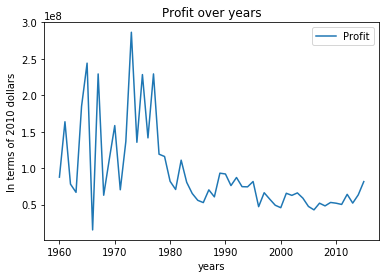

In [20]:
# plotting line chart for profit
plt.plot(year_mean.index, year_mean['profit'],label='Profit')
plt.xlabel('years')
plt.ylabel('In terms of 2010 dollars')
plt.title('Profit over years')
plt.legend()

**Conclusion:**
>- Overrall, the average profit per movie is lower since 1980; There is less profit to making a movie compared with three decades ago.
>- In the earlier years from 1960 to 1980, film industry have higher prifit but with very high fluctuation too, and the profit trend is more stable in recent years.
>- We can conclude in the earlier years, film industry is relatively new, high risk is associated with high profit.

### Question 2: Are newer movies more popular?

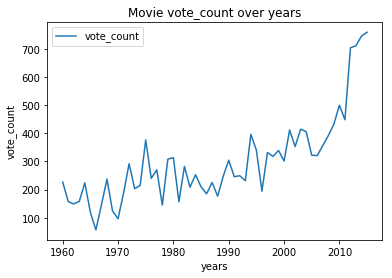

In [21]:
# Since popularuty variable has some outlier data, we use vote_count to count for popularity.
plt.plot(year_mean.index, year_mean['vote_count'], label='vote_count')
plt.xlabel('years')
plt.ylabel('vote_count')
plt.title('Movie vote_count over years')
plt.legend()

**Conclusion:**
>- Yes. There is clear trend that the newer movies are more popular. 

### Question 3: What kinds of properties are associated with movies that have high revenues?

**1. Find out the movies with very high revenues**

In [22]:
# check the distribution for 'revenue_adj'
tmdb.revenue_adj.describe([.8,.9]).iloc[3:]

min    0.000000e+00
50%    2.872138e+07
80%    1.496016e+08
90%    2.880722e+08
max    2.827124e+09
Name: revenue_adj, dtype: float64

In [23]:
# Create an ordinal data column to categarize movies with different levels of revenues
bin_edge=[-1, 0.1, 2.872138e+07, 1.496016e+08, 2.880722e+08, 3e+09]
bin_names=['zero','very_low','low','high','very_high']
tmdb['revenue_level']=pd.cut(tmdb.revenue_adj,bin_edge,labels=bin_names)
tmdb['revenue_level'].value_counts()

low          1550
zero         1312
very_low     1271
very_high     517
high          516
Name: revenue_level, dtype: int64

>- Half of the movies have very_low or even negative revenue
>- There are **517 movies with very high_revenue**, let's focus on these movies.

In [24]:
# Create a dataframe that only contains movies with very high revenues
very_high=tmdb[tmdb['revenue_level']=='very_high']
# View top 5 very_high revenue movies
very_high.head()

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,revenue_level
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,very_high
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,very_high
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,very_high
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,very_high
5,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,3929,7.2,2015,1.241999e+08,4.903142e+08,3.661143e+08,very_high


**2. Find out among the very_high profit movies, what kinds of generes are the most common ones.** 

In [25]:
# separate the generes with '|' and make it a new table
generes=very_high['genres'].str.split('|', expand=True)
# view the new table
generes.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
5,Western,Drama,Adventure,Thriller,None


In [26]:
# Count the frequency for each genere for column 0, sorted as index.
col_0=generes.loc[:,0].value_counts().sort_index()
col_0

Action             121
Adventure          116
Animation           44
Comedy              63
Crime               12
Drama               61
Family              12
Fantasy             26
History              3
Horror               9
Music                6
Mystery              3
Romance              6
Science Fiction     21
Thriller             9
War                  3
Western              2
Name: 0, dtype: int64

In [27]:
# Convert the pandas Series to a data frame 
df_0=pd.DataFrame(data=col_0, index=col_0.index)
df_0.head()

,0
Action,121
Adventure,116
Animation,44
Comedy,63
Crime,12


In [28]:
# do the same for other columns:
col_1=generes.loc[:,1].value_counts().sort_index()
df_1=pd.DataFrame(data=col_1, index=col_1.index)

col_2=generes.loc[:,2].value_counts().sort_index()
df_2=pd.DataFrame(data=col_2, index=col_2.index)

col_3=generes.loc[:,3].value_counts().sort_index()
df_3=pd.DataFrame(data=col_3, index=col_3.index)

col_4=generes.loc[:,4].value_counts().sort_index()
df_4=pd.DataFrame(data=col_4, index=col_4.index)

In [29]:
# join the other 4 dataframe together
generes_join=df_0.join(df_1).join(df_2).join(df_3).join(df_4)
generes_join.head()

,0,1,2,3,4
Action,121,79,33,3.0,4.0
Adventure,116,74,36,14.0,1.0
Animation,44,23,9,3.0,2.0
Comedy,63,44,37,13.0,5.0
Crime,12,16,19,11.0,2.0


In [30]:
# calculate the sum of each genere's frequency
generes_join['sum']=generes.sum(axis=1)

In [31]:
# sort value based on frequency sum and show top 5
generes_join.sort_values('sum', ascending=False).head()

,0,1,2,3,4,sum
Action,121,79,33,3.0,4.0,NaN
Adventure,116,74,36,14.0,1.0,NaN
Animation,44,23,9,3.0,2.0,NaN
Comedy,63,44,37,13.0,5.0,NaN
Crime,12,16,19,11.0,2.0,NaN


>- Now we can see among these very_high revenue movies, the generes with **'Action', 'Adventure', 'Comedy','Drama', 'Thriller'** are top five generes

**3. Explore movie runtime for very_high revenue movies**

Text(0.5, 1.0, 'Runtime distribution for very high revenue movies')

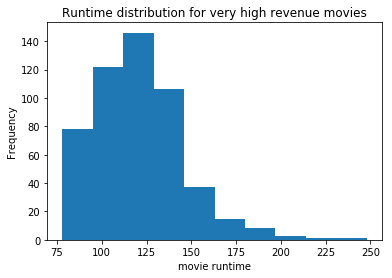

In [32]:
# check the runtime distribution
very_high['runtime'].plot.hist()
plt.xlabel('movie runtime')
plt.title('Runtime distribution for very high revenue movies')

>- Most movies in this dataset have runtime ranging from **75 to 150 minutes, with 100 to 125 the most popular**. 
>- Although some movies that have long runtime also have high revenue,a movie made under 1 hour is less likely to have very high revenue.

**4. Explore release_year for very_high revenue movies**

Text(0.5, 1.0, 'Release_year distribution for very high revenue movies')

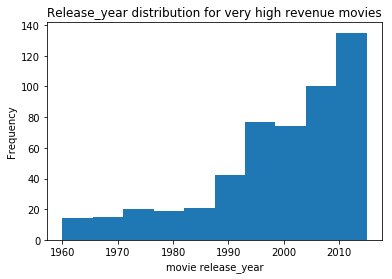

In [33]:
# check the release_year distribution
very_high['release_year'].plot.hist()
plt.xlabel('movie release_year')
plt.title('Release_year distribution for very high revenue movies')

>- The movies in this dataset range from 1960 to 2015, which is very similiar distribution with the plot from whole dataset. 
>- Since there are more movies produced over years and from the line chart previously, we can conclude newer movies does not mean higher profit, it will depend on the movie itself. 

**5. Explore movie ratings for very_high revenue movies**

Text(0.5, 1.0, 'Movie ratings distribution for very high revenue movies')

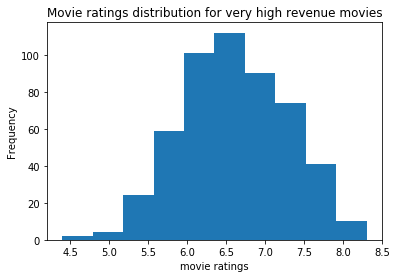

In [34]:
# check the vote_average' distribution
very_high['vote_average'].plot.hist()
plt.xlabel('movie ratings')
plt.title('Movie ratings distribution for very high revenue movies')

>- The chart reveals similar pattern compared with the plotting for whole dataset, but with higher rating in general ,ranging from 4.5 to 8.5, and average is roughly 6.5. From the heatmap earlier, we also see there isn't strong relation between vote_average and high revenue, but a movie with low rating will not have very high revenue.

**6. Explore budget for very_high revenue movies**

Text(0.5, 1.0, 'Relation between revenue and budget')

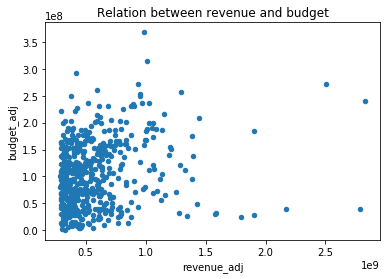

In [35]:
# Are these high revenue movies made with high budget?
very_high.plot.scatter(x='revenue_adj', y='budget_adj')
plt.title('Relation between revenue and budget')

>- From the heatmap for movies with whole dataset, we found budget and revenue are positively related with each other, however, as we can see among these high_revenue movies, the correlation pattern is weak. 
>- There are some high reveue moives with low budget and vice versa

### Question 4. Is it possible to make extremely high profit movies with low budget?

In [36]:
# find out the median value for the whole data
tmdb.budget_adj.median()

22735593.84987325

In [37]:
# create a table for low_budget
low_budget=tmdb[tmdb['budget_adj']<22735593.850]
print(low_budget.shape[0])
low_budget['revenue_level'].value_counts()

2583


zero         1022
very_low      910
low           548
high           64
very_high      39
Name: revenue_level, dtype: int64

In [38]:
# There are 39 movies in the low budget group but with very_high revenue
# Create a table for these movies 
low_budget_very_high_revenue=low_budget[low_budget['revenue_level']=='very_high']
low_budget_very_high_revenue.head()

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,revenue_level
1340,0.602862,Saturday Night Fever,John Travolta|Karen Lynn Gorney|Barry Miller|J...,John Badham,118,Drama|Music,192,6.3,1977,1.259223e+07,8.530813e+08,8.404891e+08,very_high
1922,5.293180,Black Swan,Natalie Portman|Mila Kunis|Vincent Cassel|Barb...,Darren Aronofsky,108,Drama|Mystery|Thriller,2597,7.1,2010,1.300000e+07,3.278037e+08,3.148037e+08,very_high
1966,1.385499,The King's Speech,Colin Firth|Geoffrey Rush|Helena Bonham Carter...,Tom Hooper,118,Drama|History,1688,7.4,2010,1.500000e+07,4.142115e+08,3.992115e+08,very_high
2411,3.555720,American Beauty,Kevin Spacey|Annette Bening|Thora Birch|Wes Be...,Sam Mendes,122,Drama,1756,7.7,1999,1.963579e+07,4.664111e+08,4.467753e+08,very_high
2420,1.825695,American Pie,Jason Biggs|Chris Klein|Thomas Ian Nicholas|Al...,Paul Weitz|Chris Weitz,95,Comedy|Romance,1405,6.4,1999,1.439958e+07,3.082597e+08,2.938601e+08,very_high


In [39]:
# calculate the profit mean value in the categary 
low_budget_very_high_revenue['profit'].mean()

428662726.1324031

In [40]:
# We can also sort profit from the whole data to see the top 39 most profitable movies.
top_39_profit=tmdb.sort_values('profit',ascending=False).head(39)
top_39_profit.head(3)

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,revenue_level
1329,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09,very_high
1386,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,2.408869e+08,2.827124e+09,2.586237e+09,very_high
5231,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,4654,7.3,1997,2.716921e+08,2.506406e+09,2.234714e+09,very_high


In [41]:
# calculate the profit mean value in the categary 
top_39_profit['profit'].mean()

1289695311.380965

In [42]:
# compare the difference in the two group
top_39_profit['profit'].mean()-low_budget_very_high_revenue['profit'].mean()

861032585.2485619

**Conclusion:**
>- Even though some low_budget movies made very_high revenues (among top 10% revenue), the difference between the average for top 39 profit movies and low_budget movies are huge.
>- This can imply that for the movies made with huge profit, they are made with huge budget too. We can not expect a movie with low budget to make extremely high profit; however it is possible to make low budget movies with moderately high profit, but the chances are not significant, there are only 39 very_high revenue movies in the low_budget table.

### Question 5. What are the top 10 rated movies? and how is their profitibility?

Since some movies have more vote_count, we can not directly compare a movie rated 10 with only 3 counts to the movie rated 7 with 100 counts. We will use IMDB'a definition to calculated weighted average for rating score.

In [43]:
# m is the minimum votes required to be listed in the chart;
m= tmdb['vote_count'].quantile(0.9)
m

1080.0

In [44]:
# C is the mean vote across the whole report
C=tmdb['vote_count'].mean()
print(C)

408.8737901664731


In [45]:
# Create a table for top 10% highest rated movies
q_movies = tmdb.copy().loc[tmdb['vote_count'] >= m]
q_movies.shape

(517, 13)

In [46]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [47]:
# show the top 10 rated movies
q_movies.sort_values('score',ascending=False).head(10)

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,revenue_level,score
1939,2.100704,True Grit,Jeff Bridges|Hailee Steinfeld|Matt Damon|Josh ...,Ethan Coen|Joel Coen,110,Drama|Adventure|Western,1084,7.0,2010,3.800000e+07,2.522769e+08,2.142769e+08,high,207.565478
1408,1.895894,The Proposal,Sandra Bullock|Ryan Reynolds|Mary Steenburgen|...,Anne Fletcher,108,Comedy|Romance|Drama,1084,6.7,2009,4.065602e+07,3.225801e+08,2.819241e+08,very_high,207.415200
2891,2.017536,Jumper,Hayden Christensen|Jamie Bell|Samuel L. Jackso...,Doug Liman,88,Adventure|Fantasy|Science Fiction,1082,5.9,2008,8.608686e+07,2.250728e+08,1.389859e+08,high,207.200506
4961,2.491591,Big Fish,Ewan McGregor|Albert Finney|Billy Crudup|Jessi...,Tim Burton,125,Adventure|Fantasy|Drama,1091,7.4,2003,8.297469e+07,1.457024e+08,6.272774e+07,low,207.119803
37,3.339135,The Good Dinosaur,Raymond Ochoa|Jack Bright|Jeffrey Wright|Franc...,Peter Sohn,93,Adventure|Animation|Comedy|Family|Fantasy,1087,6.6,2015,1.609999e+08,3.053719e+08,1.443720e+08,very_high,207.087168
1936,2.162441,The Tourist,Johnny Depp|Angelina Jolie|Paul Bettany|Timoth...,Florian Henckel von Donnersmarck,103,Action|Thriller|Romance,1084,6.0,2010,1.000000e+08,2.783462e+08,1.783462e+08,high,207.064553
8460,2.775756,Fargo,William H. Macy|Frances McDormand|Steve Buscem...,Joel Coen,98,Crime|Drama|Thriller,1093,7.6,1996,9.731517e+06,8.426378e+07,7.453227e+07,low,207.036582
715,1.779861,The Monuments Men,Matt Damon|Cate Blanchett|George Clooney|Bill ...,George Clooney,118,War|Drama|History|Action,1083,5.7,2014,6.447637e+07,1.427544e+08,7.827803e+07,low,207.007302
770,0.967846,The Babadook,Essie Davis|Noah Wiseman|Daniel Henshall|Hayle...,Jennifer Kent,93,Drama|Thriller|Horror,1089,6.5,2014,1.842182e+06,6.149638e+06,4.307456e+06,very_low,206.852095
4976,1.622536,The Last Samurai,Tom Cruise|Ken Watanabe|William Atherton|Chad ...,Edward Zwick,154,Drama|Action|War|History,1093,7.1,2003,1.659494e+08,5.414205e+08,3.754711e+08,very_high,206.785087


>- Above are the movies with highest rating score, but as we can see, they are not all have very_high revenue, in fact some have low revenues.

In [48]:
q_movies['revenue_level'].value_counts()

very_high    278
high         114
low          110
very_low      12
zero           3
Name: revenue_level, dtype: int64

>- About one quarter of the highly rated movies have revel_level as low, very_low or zero.
>- This can confirm the earlier findings that high rating does not have strong correlation with revenue

<a id='conclusions'></a>
## Conclusions

In this project we did comprehensive analysis on the movie database with a focus on movie revenues and other properties like generes and rating score. We did initial data exploration and answered all the questions 

**summarize some of the featured findings:**
>- In general, higher budget can yield higher revenues; movies made with low budget can have moderately high revenue, but successful rate is not very high.
>-  Popular movies have more vote_count and also have higher revenues, and newer movies are more popular
>- Although much more movies are produced over time, movies industry is more stable and annual average profit per movie is less compared with movies made 3 decades ago.
>-  'Action', 'Adventure', 'Comedy','Drama', 'Thriller' are the most common generes for movies with very_high revenue
>-  Movies with high rating scores do not always have high revenues.